<a href="https://colab.research.google.com/github/SridharSeshadri56/Inventory-Models/blob/main/newsVendorModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Vendor Model

This model calculates optimal order quantity when demand is seasonal. It also computes the expected sales, salvaged quantity and expected profit. It assumes that demand is distributed normally.

We first import some packages.

In [1]:
!pip install tabulate
!pip install termcolor
from tabulate import tabulate
import numpy as np
import pandas as pd
from termcolor import colored
from math import ceil
from scipy import stats
NormalDist = stats.norm

Here we enter the parameters of the model. Enter the mean demand, stnadrad deviation of demand (during a season), the marginal benefit of one unit sold (selling price - cost usually), marginal cost of one unit (usually cost - salvage value if not sold during the season) and unti cost (cost of purchasing one item)

In [2]:
# Enter Data:
MeanDemand      = 2000   # Enter the mean demand
StdDevDemand    = 500  # Enter the standard deviation of demand
MarginalBenefit = 200 # Enter the marginal benefit per unit (usually selling price - unit cost)
MarginalCost    = 55  # Enter the marginal cost per unit (usually unit cost - salvage value per unit if unsold)
UnitCost        = 250 # Enter the cost per unit


In [3]:
# Print data entered 

print(colored("\nThis is the data you entered: \n", color = "blue"))
print(" Mean Demand      = {}  ".format(MeanDemand))
print(" StdDev Demand    = {} ".format(StdDevDemand))
print(" Marginal Benefit = {} ".format(MarginalBenefit))
print(" Marginal Cost    = {} \n UnitCost         = {}".format(MarginalBenefit, MarginalCost, UnitCost) )


This is the data you entered: 

 Mean Demand      = 2000  
 StdDev Demand    = 500 
 Marginal Benefit = 200 
 Marginal Cost    = 200 
 UnitCost         = 55


First compute the Critical Ratio (which is the optimal fraction of demand to be served) and the Optimal Order Quantity based on the Critical Ratio.

In [4]:
# Order Quantity calculations
CriticalRatio = MarginalBenefit/(MarginalBenefit+MarginalCost)
OrderQuantity = ceil(StdDevDemand*NormalDist.isf(1-CriticalRatio, 0, 1) + MeanDemand) # Rounded up

print(colored(" Critical Ratio and Order Quantity: \n", color = "blue"))
print(" Critical Ratio   = {:.3f}".format(CriticalRatio))
print(" Order Quantity   = {}".format(OrderQuantity))

 Critical Ratio and Order Quantity: 

 Critical Ratio   = 0.784
 Order Quantity   = 2394


We now compite expected sales, expected units salvaged at end of season and the expected profit. We give option to change the order quantity.

In [5]:
# You can change the Order Quantity to examine effect on profit

OrderQuantity = OrderQuantity  # Change the right hand side to your choice

In [6]:
# Now for the more complex work of computing expected sales, expected salvage value and expected profit
zValue = (OrderQuantity-MeanDemand)/StdDevDemand
cdf = stats.norm.cdf(zValue)
pdf = stats.norm.pdf(zValue)
ExpectedSales  = OrderQuantity*(1-cdf)+MeanDemand*cdf-StdDevDemand*pdf
ExpectedSalvage = OrderQuantity*cdf-MeanDemand*cdf + StdDevDemand*pdf
ExpectedProfit = ExpectedSales*(MarginalBenefit + UnitCost) + ExpectedSalvage*(UnitCost - MarginalCost) - OrderQuantity*UnitCost
print(colored(" Expected Sales, Salvage, Profit: \n", color = "blue"))
print(" Expected Sales   = {:.1f} (units)".format(ExpectedSales))
print(" Expected Salvage = {:.1f} (units)".format(ExpectedSalvage))
print(" Expected Profit  = {:.2f} (dollars)".format(ExpectedProfit))


 Expected Sales, Salvage, Profit: 

 Expected Sales   = 1938.6 (units)
 Expected Salvage = 455.4 (units)
 Expected Profit  = 362676.77 (dollars)


We can demonstrate the calculations using simulation. Here we generate the demand 10000 times. For the given order quantity calculate the underage and overage quantities. Use these to find the average sales, average quantity salvaged and the average profit.

In [7]:
s = np.random.normal(MeanDemand, StdDevDemand, 10000)

In [8]:
underage = np.zeros(10000)
overage = np.zeros(10000)
for i in range(10000):
    underage[i] = max(s[i]-OrderQuantity,0)
    overage[i] = max(OrderQuantity-s[i],0)

Average Underage = 62.02, Average Overage = 458.32
Expected Sales = 1937.98, Expected Salvage = 62.02
Expected Profit = 362960.62


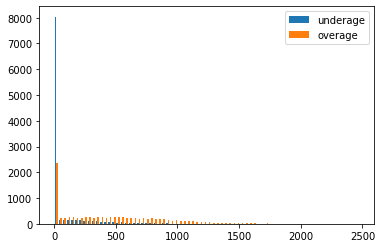

In [9]:
import matplotlib.pyplot as plt
aveunderage = np.average(underage)
aveoverage = np.average(overage)
avesales = MeanDemand - aveunderage
print('Average Underage = {:.2f}, Average Overage = {:.2f}'.format(aveunderage, aveoverage))
print('Expected Sales = {:.2f}, Expected Salvage = {:.2f}'.format(avesales,aveunderage))
print('Expected Profit = {:.2f}'.format(avesales*(MarginalBenefit + UnitCost) 
                        + aveoverage*(UnitCost - MarginalCost) - OrderQuantity*UnitCost ))
plt.hist([underage, overage], bins='auto', label = ['underage', 'overage'])
plt.legend(loc='upper right')
plt.show()